<Figure size 720x432 with 0 Axes>

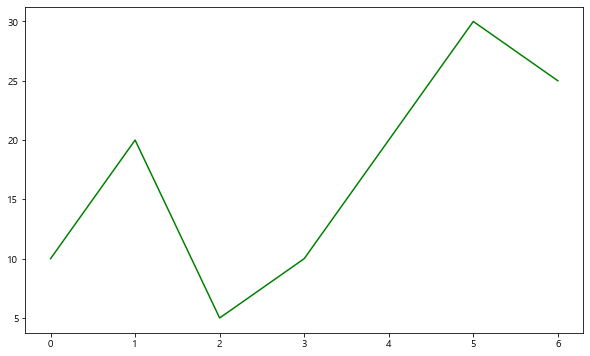

In [18]:
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline

plt.figure(figsize=(10,6))

t = [0, 1, 2, 3, 4, 5, 6]
y = [10, 20, 5, 10, 20, 30, 25]

plt.figure(figsize=(10,6))
plt.plot(t, y, color='green')

plt.show()

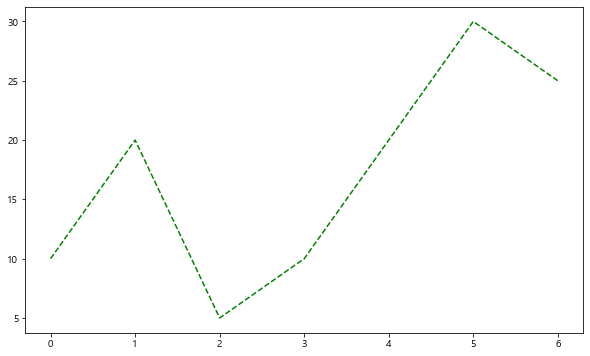

In [19]:
#linestyle을 dashed로 지정한 경우 
plt.figure(figsize=(10,6))

plt.plot(t, y, color='green', linestyle='dashed')

plt.show()

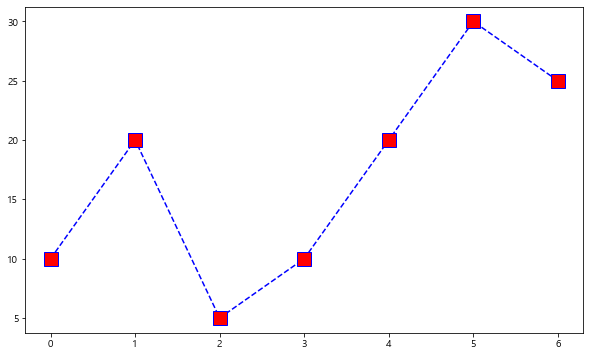

In [20]:
#이번에는 marker를 'o'로 지정하고 색깔과 크기를 지정한 경우 
plt.figure(figsize=(10,6))

plt.plot(t, y, color='blue', linestyle='dashed', marker='s', markerfacecolor='red', markersize=14)

plt.show()

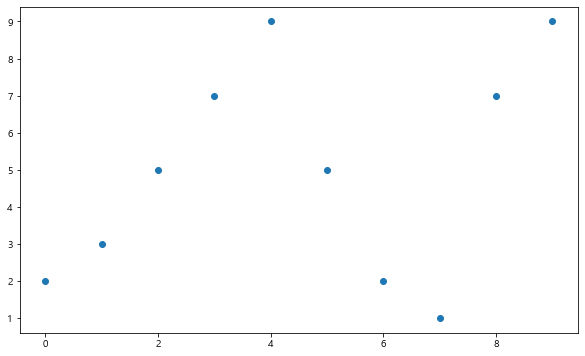

In [21]:
#시간축(t)과 데이터축(y)을 생성해서 산포도로 출력 
t = np.array([0,1,2,3,4,5,6,7,8,9])

y = np.array([2,3,5,7,9,5,2,1,7,9])

plt.figure(figsize=(10,6))

plt.scatter(t,y)

plt.show()

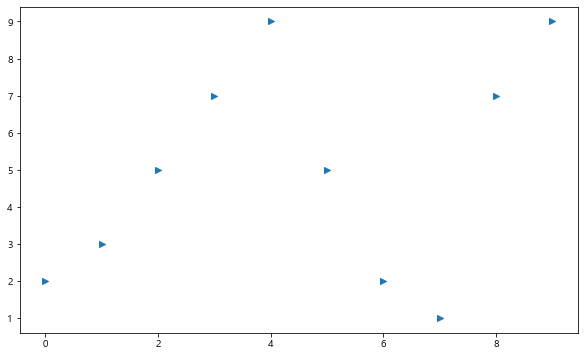

In [22]:
#이번에는 marker를 '>'로 지정 
plt.figure(figsize=(10,6))

plt.scatter(t, y, marker='>')

plt.show()

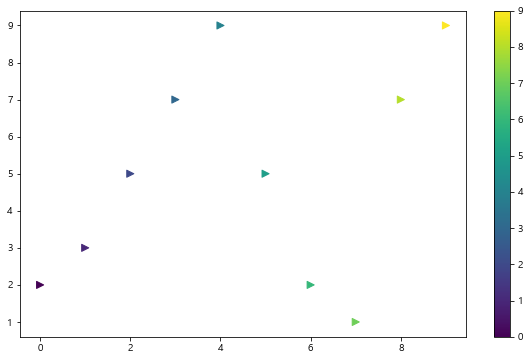

In [23]:
#이번에는 컬러맵을 생성 
colormap = t 

plt.figure(figsize=(10,6))

plt.scatter(t, y, s=50, c=colormap, marker='>')

plt.colorbar()

plt.show()

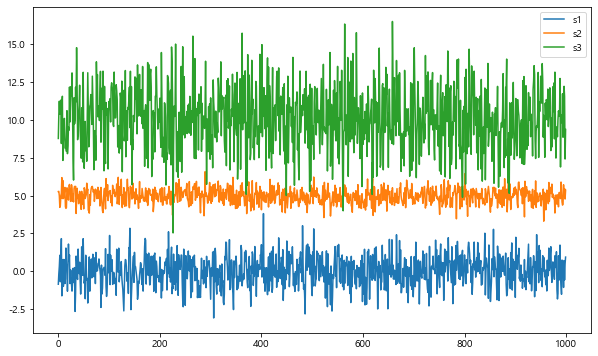

In [24]:
#랜덤값을 3개 만들고 스캐일을 1, 0.5, 2로 주고 파장을 출력 
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

plt.figure(figsize=(10,6))

plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')

plt.legend()

plt.show()

In [25]:
#한글처리에 필요한 코드 rc 셋팅을 미리 변경 
import platform

from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False 

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

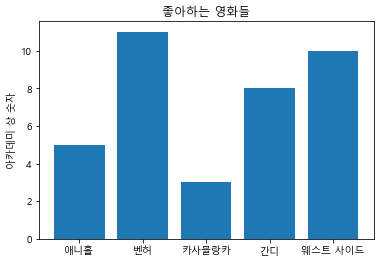

In [26]:
#영화 데이터로 막대 그래프 출력 
movies = ["애니홀", "벤허", "카사블랑카", "간디", "웨스트 사이드"]

num_oscars = [5, 11, 3, 8, 10]

plt.bar(movies, num_oscars)

plt.ylabel("아카데미 상 숫자")
plt.title("좋아하는 영화들")
plt.show()

In [27]:
#엑셀 파일 읽기
import pandas as pd 
dfExcel = pd.read_excel('c:\\work\\demo.xlsx', 'Sheet1')

dfExcel

,사번,성별,나이,판매금액,수입
0,E001,M,34,123,350
1,E002,F,40,114,450
2,E003,F,37,135,169
3,E004,M,30,139,189
4,E005,F,44,117,183
5,E006,M,36,121,90
6,E007,M,32,133,166
7,E008,F,26,140,120
8,E009,M,32,133,75
9,E010,M,36,133,40


<AxesSubplot:title={'center':'남녀별 판매금액 합계'}, xlabel='성별', ylabel='판매금액 합계'>

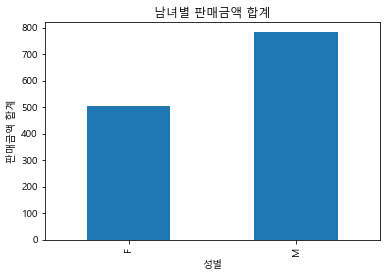

In [28]:
#남녀별 판매금액 합계 
var = dfExcel.groupby('성별').판매금액.sum()

fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)

ax1.set_xlabel('성별')

ax1.set_ylabel('판매금액 합계')

ax1.set_title('남녀별 판매금액 합계')

var.plot(kind='bar')

Text(0.5, 0, '단계')

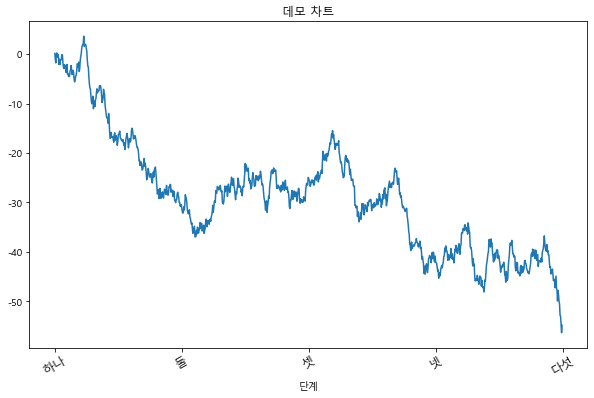

In [30]:
#눈금과 눈금간격, 범례를 지정하기 
%matplotlib inline

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1, 1, 1)

#np.random.randn(1000)
ax.plot(np.random.randn(1000).cumsum()) #1000개의 랜덤을 누적

#눈금의 간격
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

labels = ax.set_xticklabels(['하나', '둘', '셋', '넷', '다섯'], rotation=30, fontsize='large')

ax.set_title('데모 차트')

ax.set_xlabel('단계')

In [39]:
#groupby()메서드 사용 
from pandas import Series, DataFrame

#특정 기준이 되는 그룹으로 묶어서 써머리
df = DataFrame({'key1':['a','a','b','b','a'],
                'key2':['one','two','one','two','one'],
                'data1':np.random.randn(5),
                'data2':np.random.randn(5)})

#df

grouped = df['data1'].groupby(df['key1'])
#평균값
# grouped.mean()
#합계
# grouped.sum()
#갯수
grouped.count()


key1
a    3
b    2
Name: data1, dtype: int64

In [ ]:
grouped.mean()

grouped.sum()

grouped.count()

key1
a    3
b    2
Name: data1, dtype: int64

In [ ]:
#여거개의 기준점을 묶어서 처리 (엑셀의 1순위, 2순위): 메서드 체인(연속으로 메서드 호출)
means = df['data1'].groupby( [df['key1'], df['key2']] ).mean()

means

key1  key2
a     one     0.128371
      two     0.376199
b     one     1.413552
      two     0.668102
Name: data1, dtype: float64